# Similaridade entre segmentos
Ruwet (1966) propõe um método analítico chamado *análise paradigmática*, caracterizado pela segmentação temporal da música e agrupamento dos segmentos similares em grupos. Esse tipo de análise foi desenvolvido por Nattiez (2021) e outros pesquisadores. Para Nattiez, o objetivo da análise paradigmática seria encontrar os tipos básicos de materiais de uma peça (por exemplo, os motivos centrais de uma melodia), partindo de uma segmentação da mesma e comparando todos os diferentes segmentos entre si para estabelecer grupos (clusters) que compartilhassem traços formais.<br><br>
Esta seção se dedica a explorar a análise paradimática de KSII (mov.1), buscando elaborar diferentes métricas que permitam avaliar o grau de similaridade/contraste dos segmentos, para chegar em uma possível classificação do material em categorias básicas. <br><br>
Estudando a bibliografia dedicada ao tema (EEROLA, TOIVIAINEN 2002; CAMBOUROPOULOS, WIDMER, 2000; HOLZAPFEL,2010), fica fácil observar que não há consenso geral sobre que métricas são adequadas em análise musical, embora haja sempre inclusão de aspectos relacionadas às alturas, intervalos e ritmos. Não parece se tratar de um campo voltado a medidas exatas, mas sim de criar uma forma de comparação entre segmentos musicais que revele os traços formais do material estudado. Assim, nossa intuição musical foi a de definir métricas globais que permitissem separar os segmentos da análise automática realizada anteriormente em grupos/clusters para, em seguida, explorar métricas mais finas dentro de cada cluster. 

## Timbres

Um aspecto de grande importância na peça estudada é a grande variação de timbres, dinâmicas e modos de ataque na sequência imediata dos sons, o que contribui para uma impressão de polifonia, como se os timbres pertencessem a diferentes planos da textura. O compositor se refere a esse processo (*Kurze Schatten II for solo guitar*, 1990, p.140) utilizando o termo *polifonia de sucessividade*.

A ideia de timbres no movimento estudado implica na consideração simultânea de vários aspectos, como a morfologia do segmento - diferenciação acorde x nota -, a dinâmica, a duração, os modos de ataque, o registro, etc. Com objetivo de abordar o estudo dos timbres no movimento em questão, optamos por simplificar a questão considerando apenas os seguintes timbres:

**h**: harmônico;

**b**: pizzicato Bártok;

**p**: pizzicato;

**c**: ataque normal com duração curta;

**l**: ataque normal com duração longa (> 300ms);

**C**: acorde com duração curta;

**L**: acorde com duração longa (> 300ms)

A definição de um limiar de duração (300ms) que distinguiria sons curtos e longos é arbitrária. Apenas consideramos que a partir de 300ms já se ultrapassou o timbre mais ruidoso do ataque e se alcançou uma estabilidade de espectro mais harmônico.
Para a classificação dos timbres não é suficiente observar as durações dos eventos na tabela, mas deve-se também verificar se a partitura original traz indicação de staccato para o evento. Por exemplo, o evento 35 (acorde inicial do segmento 7) tem a duração de 846ms na tabela, mas tem indicação de staccato na partitura original e, por isso, deve ser considerado um timbre do tipo **C**.

O termo timbre é objeto de discussões controversas (**CITAR**). Está sendo utilizado neste contexto com o sentido estrito de combinar aspectos relacionados a modo de ataque, dinâmica e duração do som. A nosso ver, a complexidade do evento sonoro pode ser reduzida a um conjunto de atributos perceptivos fundamentais - no caso, chamado de timbre -, que permitem sua rápida diferenciação. 

Os timbres presentes em cada segmento são agrupados em conjuntos (*Python sets*) para avaliar sua similaridade.

## Agregar coluna de timbres à tabela
Agrega-se (manualmente) uma coluna com os dados dos timbres por segmento. Como se utilizam *Python sets*, não se consideram quantas vezes um determinado timbre se repete em cada segmento, nem sua ordenação. Apenas foi considerada relevante a indicação dos timbres presentes em cada segmento. O timbre **h** (harmônico) é apenas presente nas pautas superior e central, estando ausente nos segmentos (pauta inferior).

c:\Users\roger\anaconda3\envs\Python3_10\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


importing Jupyter notebook from etp3_automatic_segmentation_v2.ipynb
[[1, 2], [4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 97], [98, 99, 100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225], [228, 229, 

,Unnamed: 0,segments,duration,number_of_events,internal_offsets,microtons,scale,melody,interval_profile,morphology
0,0,"[1, 2]",1236,2,[932],"[[67.5], [67.5]]",[67.5],"[67.5, 67.5]",[0.0],nn
1,1,"[4, 5, 6, 7, 8]",724,5,"[142, 151, 139, 150]","[[67.5], [69.5], [70], [69], [72]]","[67.5, 69, 69.5, 70, 72]","[67.5, 69.5, 70, 69, 72]","[2.0, 0.5, -1, 3]",nnnnn
2,2,"[11, 12, 13, 14, 15, 16]",1827,6,"[103, 96, 932, 233, 236]","[[54.5], [64], [72], [56.5], [59.5], [68]]","[54.5, 56.5, 59.5, 64, 68, 72]","[54.5, 64, 72, 56.5, 59.5, 68]","[9.5, 8, -15.5, 3.0, 8.5]",nnnnnn
3,3,"[17, 18, 19, 20, 21, 22, 23, 24]",1193,8,"[179, 182, 179, 142, 133, 137, 136]","[[79], [76], [74], [71], [69], [65], [68], [66]]","[65, 66, 68, 69, 71, 74, 76, 79]","[79, 76, 74, 71, 69, 65, 68, 66]","[-3, -2, -3, -2, -4, 3, -2]",nnnnnnnn
4,4,"[25, 26, 27]",327,3,"[105, 114]","[[63], [65], [68]]","[63, 65, 68]","[63, 65, 68]","[2, 3]",nnn


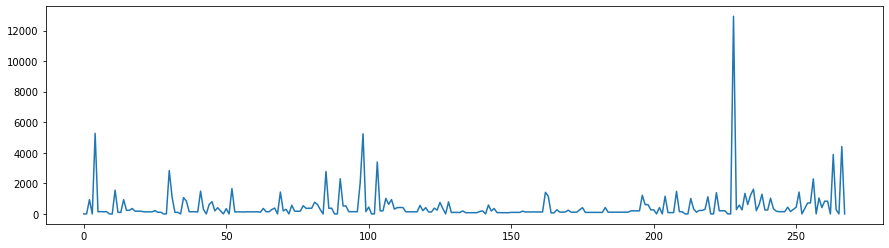

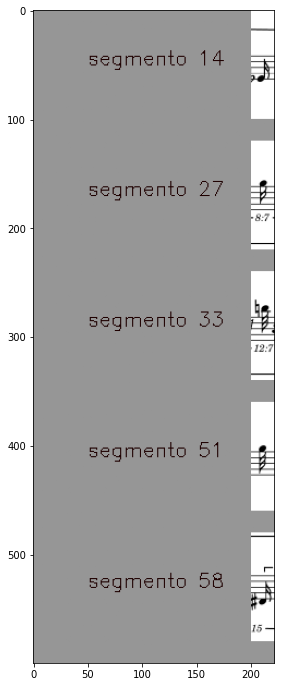

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import altair as alt

from Levenshtein import ratio
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

import import_ipynb
from etp3_automatic_segmentation_v2 import show_segments

df = pd.read_csv('segments_data_v2.csv')
df.head()

In [2]:
## timbres por segmento 
timbres = [
    {'b','p'}, {'c'}, {'c','l'}, {'c'}, {'c'}, {'C'},
    {'c'}, {'C','c'}, {'C'}, {'C','p','b'}, {'p'}, {'C'}, {'c'}, {'b', 'c'}, {'b'}, {'c', 'l'}, {'c'},
    {'L','C','c'}, {'L','c'}, {'C'}, {'p'}, {'b'}, {'c'}, {'L'}, {'c'}, {'L'}, {'p'},
    {'b'}, {'L','C'}, {'c'}, {'c'}, {'c'}, {'c','l'}, {'b'}, {'c'}, {'c'}, {'b','C'}, {'C','b'}, {'c'}, {'c'}, {'L', 'c'}, 
    {'c'}, {'c'}, {'c'}, {'c'}, {'p', 'b'}, {'b', 'p'}, {'C'}, {'c'}, {'p'}, {'l', 'c'},
    {'b'}, {'c'}, {'c', 'l'}, {'l', 'c', 'L'}, {'c', 'l'}, {'c'},
    {'b', 'c'}, {'b'}, {'l', 'c'}, {'C'}, {'L', 'l'}, {'c'}, {'C'}
] 

df['timbres'] = timbres
df.head()

,Unnamed: 0,segments,duration,number_of_events,internal_offsets,microtons,scale,melody,interval_profile,morphology,timbres
0,0,"[1, 2]",1236,2,[932],"[[67.5], [67.5]]",[67.5],"[67.5, 67.5]",[0.0],nn,"{b, p}"
1,1,"[4, 5, 6, 7, 8]",724,5,"[142, 151, 139, 150]","[[67.5], [69.5], [70], [69], [72]]","[67.5, 69, 69.5, 70, 72]","[67.5, 69.5, 70, 69, 72]","[2.0, 0.5, -1, 3]",nnnnn,{c}
2,2,"[11, 12, 13, 14, 15, 16]",1827,6,"[103, 96, 932, 233, 236]","[[54.5], [64], [72], [56.5], [59.5], [68]]","[54.5, 56.5, 59.5, 64, 68, 72]","[54.5, 64, 72, 56.5, 59.5, 68]","[9.5, 8, -15.5, 3.0, 8.5]",nnnnnn,"{l, c}"
3,3,"[17, 18, 19, 20, 21, 22, 23, 24]",1193,8,"[179, 182, 179, 142, 133, 137, 136]","[[79], [76], [74], [71], [69], [65], [68], [66]]","[65, 66, 68, 69, 71, 74, 76, 79]","[79, 76, 74, 71, 69, 65, 68, 66]","[-3, -2, -3, -2, -4, 3, -2]",nnnnnnnn,{c}
4,4,"[25, 26, 27]",327,3,"[105, 114]","[[63], [65], [68]]","[63, 65, 68]","[63, 65, 68]","[2, 3]",nnn,{c}


In [3]:
# salvar tabela
df.to_csv('segments_data_v3.csv', index=False)

## Métricas Globais
1. distância entre segmentos baseada na duração;
2. distância entre segmentos baseada no número de eventos internos;
3. distância entre segmentos baseada no timbre;
4. combinação das distâncias anteriores em um valor único

In [3]:
## métricas

def duration_dist(segment1_dur, segment2_dur):
    '''
    Distância normalizada entre segmentos pela razão entre a duração do menor e a duração do maior.
    '''
    return 1 - min(segment1_dur,segment2_dur)/max(segment1_dur,segment2_dur)

def number_of_events_dist(segment1_num, segment2_num):
    '''
    Distância normalizada entre segmentos pela razão entre o número de eventos (menor/maior).
    '''
    return 1 - min(segment1_num,segment2_num)/max(segment1_num,segment2_num)

def morphology_dist(segment1_morph, segment2_morh):
    '''
    Distância normalizada entre segmentos pela distância de Levenshtein aplicada às morfologias.
    '''
    return 1 - ratio(segment1_morph, segment2_morh)

def timbre_dist(segment1_timbre, segment2_timbre):
    '''
    Distância normalizada entre segmentos definida pela relação entre a interseção e a união dos conjuntos de timbres
    (Jaccard Index).
    '''
    return 1 - (len(segment1_timbre.intersection(segment2_timbre)) / len(segment1_timbre.union(segment2_timbre)))


def global_dist(df, segment1_index, segment2_index, weights=[1,1,1,1]):
    '''
    Distância ponderada entre segmentos combinando as métricas 
    duration_dist, number_of_events_dist e morphology_dist.
    '''
    w = [i/sum(weights) for i in weights]
    d1 = duration_dist(df.loc[segment1_index, 'duration'], df.loc[segment2_index, 'duration'])
    d2 = number_of_events_dist(df.loc[segment1_index, 'number_of_events'], df.loc[segment2_index, 'number_of_events'])
    d3 = morphology_dist(df.loc[segment1_index, 'morphology'], df.loc[segment2_index, 'morphology'])
    d4 = timbre_dist(df.loc[segment1_index, 'timbres'], df.loc[segment2_index, 'timbres'])
    return d1*w[0] + d2*w[1] + d3*w[2] + d4*w[3]

In [4]:
## auxiliary functions

def group_lst(lst_items, lst_group):
    result = []
    pos = 0
    for i in lst_group:
        result.append(lst_items[pos:pos+i])
        pos += i
    return result


def count_unique(lst):
    '''
    Retorna dicionário com número de ocorrências de cada elemento na lista (histograma).
    '''
    unique = list(set(lst))
    dict = {}
    cnt = [lst.count(i) for i in unique]
    for i,j in zip(unique,cnt):
        dict[i] = j 
    return dict


def clusters_dict(labels_array):
    '''
    Retorna um dicionário com número dos segmentos agrupados por cluster
    a partir de um array de labels (gerado por AgglomerativeClustering).
    '''
    labels_sorted = labels_array.argsort().tolist()
    labels_lst = labels_array.tolist()
    count_dict = count_unique(labels_lst)
    group_sizes = [i for i in count_dict.values()]
    group_labels = group_lst(labels_sorted, group_sizes)
    labels_dict = {}
    for i,j in zip(count_dict.keys(), group_labels):
        labels_dict[i] = j
    # sort dict
    for k,v in labels_dict.items():
        labels_dict[k] = sorted(v)
    return labels_dict

In [6]:
idx = range(df.shape[0])
## full distance matrix
dist_mat = []
for i in idx:
    for j in idx:
        dist = global_dist(df, i, j, weights=[1,3,1,2])
        dist_mat.append(dist)

X = np.array(dist_mat).reshape((len(idx), len(idx)))
X

array([[0.        , 0.6632587 , 0.68906873, ..., 0.72105992, 0.36442441,
        0.70665742],
       [0.6632587 , 0.        , 0.31351872, ..., 0.44198405, 0.35171383,
        0.77932123],
       [0.68906873, 0.31351872, 0.        , ..., 0.40546998, 0.59946047,
        0.87508797],
       ...,
       [0.72105992, 0.44198405, 0.40546998, ..., 0.        , 0.73531842,
        0.85234536],
       [0.36442441, 0.35171383, 0.59946047, ..., 0.73531842, 0.        ,
        0.6697995 ],
       [0.70665742, 0.77932123, 0.87508797, ..., 0.85234536, 0.6697995 ,
        0.        ]])

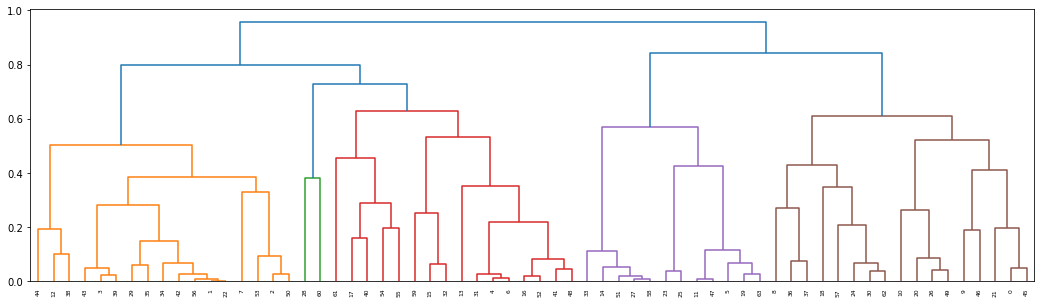

In [7]:
# compressed distance matrix
X_compr = squareform(X)

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.savefig('dendrogram.pdf')
plt.show()

O **dendrogram** é um gráfico em forma de árvore que agrupa os segmentos de modo hierárquico. Na parte inferior temos os eventos isolados (identificados pelo index), cada qual em um cluster independente. Na parte superior temos a primeira subdivisão em dois grandes clusters. à medida em vamos descendo no gráfico, novos clusters surgem da subdivisão dos anteriores. Não há um ponto de segmentação fixo, mas ele deve ser escolhido pelo analista, baseado no número de clusters desejado. Trata-se de um processo de tentativa e erro, confrontando os resultados com uma apreciação mais subjetiva. Outro parâmetro muito relevante para um resultado satisfatório é o peso relativo das distâncias na função *global_dist*. No caso, foi valorizada a *number_of_events_dist*.

In [8]:
# partição em n clusters
n_clusters = 8
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

array([2, 1, 1, 1, 0, 3, 0, 1, 6, 2, 2, 3, 1, 0, 7, 0, 0, 5, 6, 3, 2, 2,
       1, 3, 6, 3, 2, 7, 4, 1, 6, 0, 0, 7, 1, 1, 6, 6, 1, 1, 5, 0, 1, 1,
       1, 2, 2, 3, 0, 2, 1, 7, 0, 1, 5, 5, 1, 6, 7, 0, 4, 5, 6, 3],
      dtype=int64)

In [9]:
dict = clusters_dict(labels)
dict

{0: [4, 6, 13, 15, 16, 31, 32, 41, 48, 52, 59],
 1: [1, 2, 3, 7, 12, 22, 29, 34, 35, 38, 39, 42, 43, 44, 50, 53, 56],
 2: [0, 9, 10, 20, 21, 26, 45, 46, 49],
 3: [5, 11, 19, 23, 25, 47, 63],
 4: [28, 60],
 5: [17, 40, 54, 55, 61],
 6: [8, 18, 24, 30, 36, 37, 57, 62],
 7: [14, 27, 33, 51, 58]}

## Visualização dos clusters


In [10]:
X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)

df_5clusters = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_5clusters, width=500, height=500).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart.save('8clusters_v2.html')
chart

alt.Chart(...)

## Tipologia dos clusters
Segue-se uma primeira avaliação das características globais de cada cluster.
- cluster_0 => 2 a 4 notas // **c, l**
- cluster_1 => 5 a 13 notas // **c**
- clusters_2 => 2 a 3 eventos // **b, p, C**
- cluster_3 => acordes isolados // **C, L**
- cluster_4 => sequência de acordes // **C, L**
- cluster_5 => 4 a 5 eventos // **C, L, c, l**
- cluster_6 => 1 a 2 eventos // **C, L, c, b**
- cluster_7 => 1 nota // **b**

Entretanto uma avaliação mais fina vai exigir a aplicação de novas métricas, buscando evidenciar subregiões internas em cada cluster. As diferentes características de cada cluster podem exigir uma combinação diferente das novas métricas. Inicialmente serão definidas as diversas métricas utilizadas e, depois, que combinações nos pareceram mais apropriadas para cada cluster.

## Métricas para avaliação de similaridades internas em cada cluster
1. distâncias temporais entre ataques;
2. distâncias entre perfis melódicos;
3. distâncias entre escalas formada pelas notas do segmento;

In [11]:
# string to list conversion in some columns
df.segments = df.segments.apply(ast.literal_eval)
df.internal_offsets = df.internal_offsets.apply(ast.literal_eval)
df.interval_profile = df.interval_profile.apply(ast.literal_eval)
df.scale = df.scale.apply(ast.literal_eval)

In [12]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [13]:
def dtw_offsets(df, segment1_index, segment2_index):
    '''
    Distância DTW entre segmentos pela comparação dos internal_offsets.
    Apesar de normalizada, pode apresentar valores maiores que 1.
    '''
    a1 = np.array(df.loc[segment1_index, 'internal_offsets'])
    a2 = np.array(df.loc[segment2_index, 'internal_offsets'])
    align = dtw(a1, a2, keep_internals=True)
    return align.normalizedDistance


def dtw_profile(df, segment1_index, segment2_index):
    '''
    Distância DTW entre segmentos pela comparação do perfil intervalar.
    Apesar de normalizada, pode apresentar valores maiores que 1.
    '''
    a1 = np.array(df.loc[segment1_index, 'interval_profile'])
    a2 = np.array(df.loc[segment2_index, 'interval_profile'])
    align = dtw(a1, a2, keep_internals=True)
    return align.normalizedDistance


def dtw_scale(df, segment1_index, segment2_index):
    '''
    Distância DTW entre segmentos pela comparação da escala formada 
    pelas notas presentes no segmento (midi_set column).
    Apesar de normalizada, pode apresentar valores maiores que 1.
    '''
    a1 = np.array(df.loc[segment1_index, 'scale'])
    a2 = np.array(df.loc[segment2_index, 'scale'])
    align = dtw(a1, a2, keep_internals=True)
    return align.normalizedDistance


## Estudo do cluster_0

In [14]:
idx = dict[0]
idx

[4, 6, 13, 15, 16, 31, 32, 41, 48, 52, 59]

Para esse cluster foram usadas as três distâncias definidas acima (*dtw_offsets*, *dtw_profile* e *dtw_scale*), devidamente normalizadas e combinadas.

In [15]:
## full distance dtw_offsets
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_offsets(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X1 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_profile
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_profile(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X2 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X3 = np.array(dist_mat2).reshape((len(idx), len(idx)))

#=============
## média ponderada de X1, X2 e X3
weights = [1,1,1]
w = [i/sum(weights) for i in weights]
X = (X1*w[0] + X2*w[1] + X3*w[2])

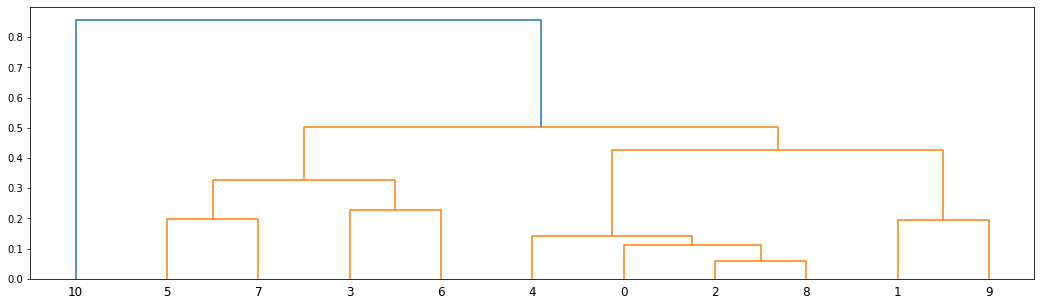

In [16]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [17]:
n_clusters = 5
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [15, 32], 1: [31, 41], 2: [6, 52], 3: [59], 4: [4, 13, 16, 48]}

In [18]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_0 region_0

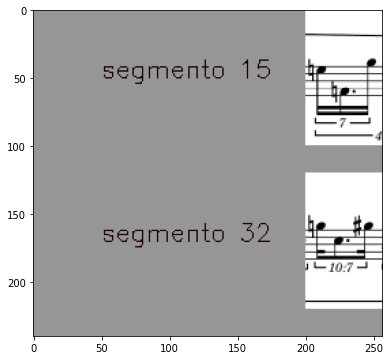

In [19]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_0 region_1

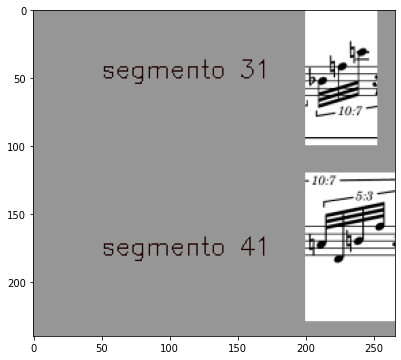

In [20]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_0 region_2

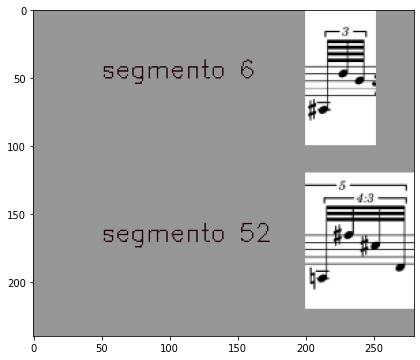

In [21]:
show_segments(dict_fix_numbering[2])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_0 region_3

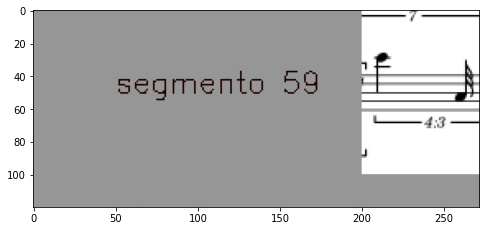

In [22]:
show_segments(dict_fix_numbering[3])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_0 region_4

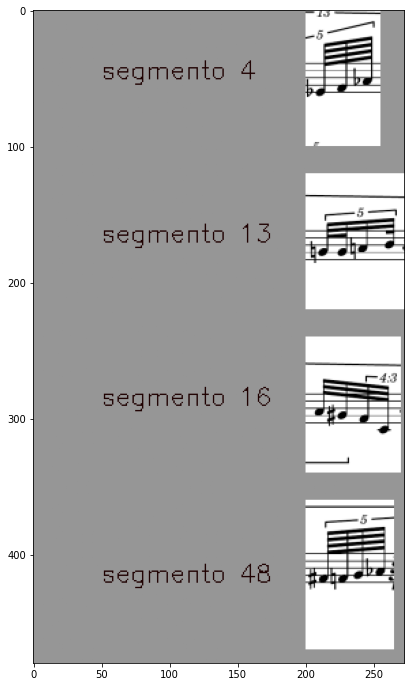

In [23]:
show_segments(dict_fix_numbering[4])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,12))
plt.imshow(img)

---

## Estudo do cluster_1

In [24]:
idx = dict[1]
idx

[1, 2, 3, 7, 12, 22, 29, 34, 35, 38, 39, 42, 43, 44, 50, 53, 56]

Para esse cluster também foram usadas as três distâncias definidas acima (*dtw_offsets*, *dtw_profile* e *dtw_scale*), devidamente normalizadas e combinadas.

In [25]:
## full distance dtw_offsets
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_offsets(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X1 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_profile
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_profile(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X2 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X3 = np.array(dist_mat2).reshape((len(idx), len(idx)))

#=============
## média ponderada de X1, X2 e X3
weights = [1,1,1]
w = [i/sum(weights) for i in weights]
X = (X1*w[0] + X2*w[1] + X3*w[2])

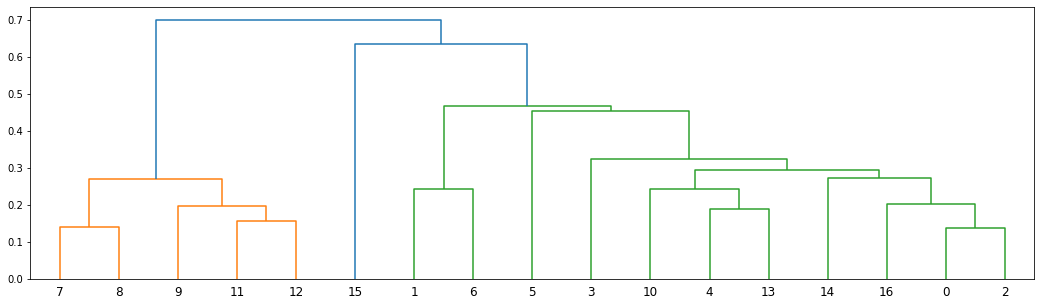

In [26]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [27]:
n_clusters = 6
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [1, 3, 12, 39, 44, 50, 56],
 1: [34, 35, 38, 42, 43],
 2: [53],
 3: [2, 29],
 4: [22],
 5: [7]}

In [28]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_1 region_0

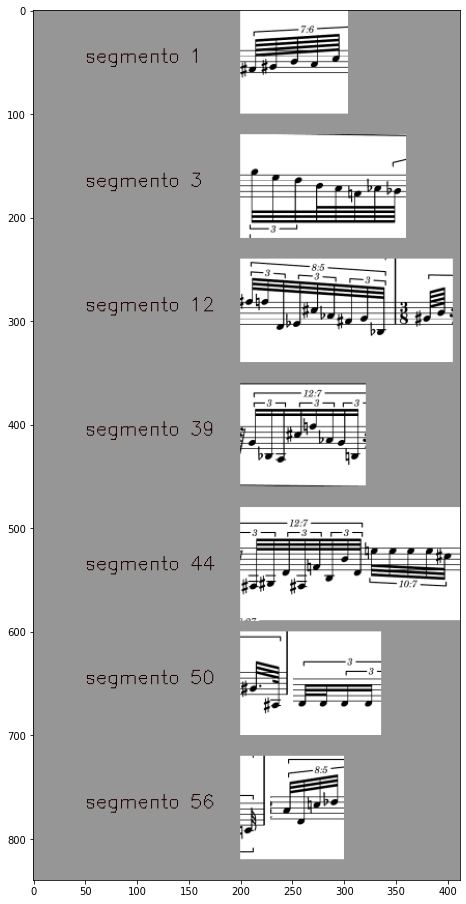

In [29]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,16))
plt.imshow(img)

### cluster_1 region_1

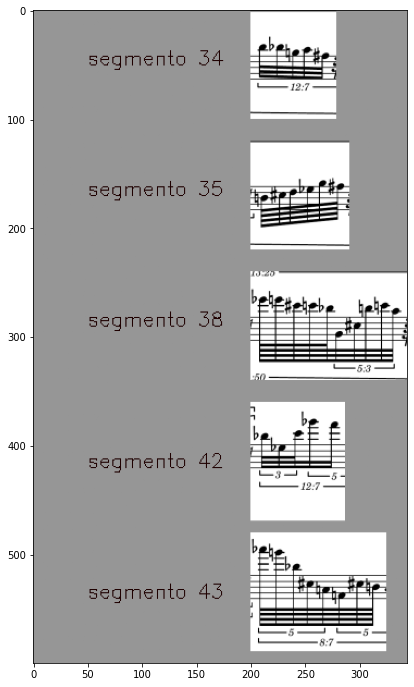

In [30]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,12))
plt.imshow(img)

### cluster_1 region_2

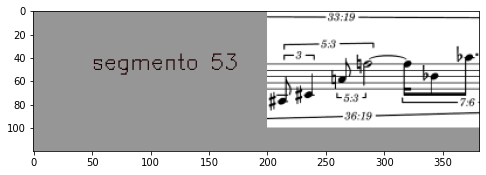

In [31]:
show_segments(dict_fix_numbering[2])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_1 region_3

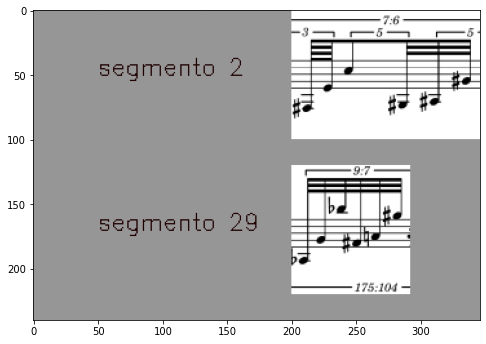

In [32]:
show_segments(dict_fix_numbering[3])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_1 region_4

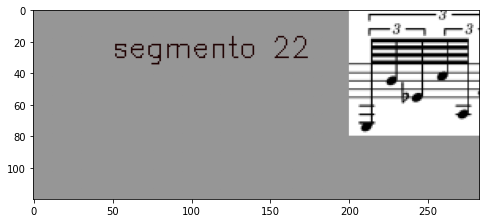

In [33]:
show_segments(dict_fix_numbering[4])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_1 region_5

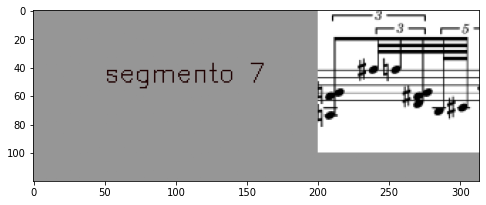

In [34]:
show_segments(dict_fix_numbering[5])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

---

## Estudo do cluster_2

In [35]:
idx = dict[2]
idx

[0, 9, 10, 20, 21, 26, 45, 46, 49]

Para esse cluster apenas foram usadas duas das distâncias definidas acima (*dtw_profile* e *dtw_scale*), devidamente normalizadas e combinadas. O número pequeno de ataques foi a razão de desconsiderarmos os offsets. Optou-se por dar um peso maior na similaridade harmônica (*scale*) do que no perfil (*profile*). Além disso, a importância dos timbres na diferenciação interna do cluster nos levou a uma reutilização da métrica *dist_timbres*. 

In [36]:
## full distance dtw_profile
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_profile(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X2 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X3 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance timbre_dist
dist_mat = []
for i in idx:
    for j in idx:
        timbre1 = df.loc[i, 'timbres']
        timbre2 = df.loc[j, 'timbres']
        dist = timbre_dist(timbre1, timbre2)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X4 = np.array(dist_mat2).reshape((len(idx), len(idx)))

#=============
## média ponderada de X2, X3 e X4
weights = [1,2,1]
w = [i/sum(weights) for i in weights]
X = (X2*w[0] + X3*w[1] + X4*w[2])

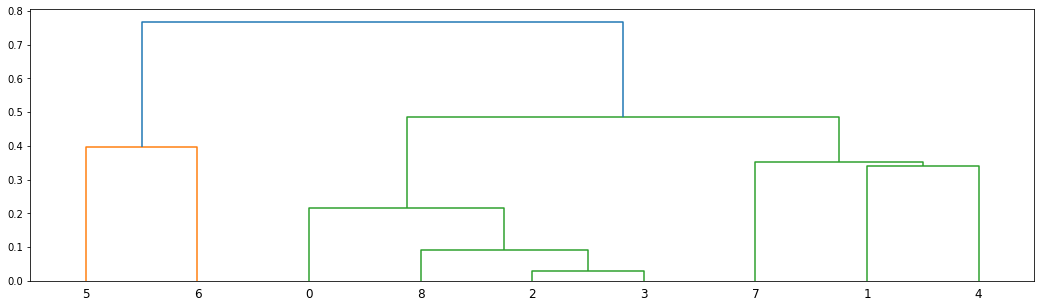

In [37]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [38]:
n_clusters = 3
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [26, 45], 1: [9, 21, 46], 2: [0, 10, 20, 49]}

In [39]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_2 region_0

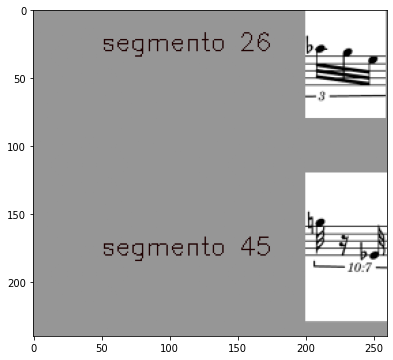

In [40]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_2 region_1

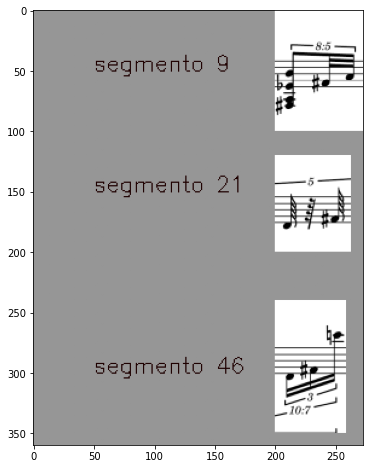

In [41]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

### cluster_2 region_2

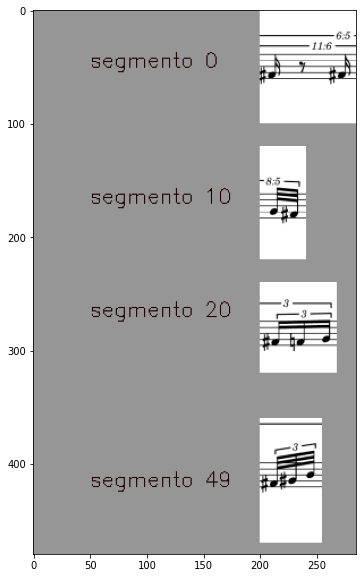

In [42]:
show_segments(dict_fix_numbering[2])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,10))
plt.imshow(img)

---

## Estudo do cluster_3

In [43]:
idx = dict[3]
idx

[5, 11, 19, 23, 25, 47, 63]

Para esse cluster apenas foram usadas duas métricas: *dtw_scale* e *timbre_dist*. Como se trata de acordes isolados, consideramos relevante avaliar o conteúdo harmônico e a distinção tímbrica entre acordes staccato e prolongado (**C** e **L**).

In [44]:
## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X3 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance timbre_dist
dist_mat = []
for i in idx:
    for j in idx:
        timbre1 = df.loc[i, 'timbres']
        timbre2 = df.loc[j, 'timbres']
        dist = timbre_dist(timbre1, timbre2)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X4 = np.array(dist_mat2).reshape((len(idx), len(idx)))

#=============
## média ponderada de X3 e X4
weights = [1,1]
w = [i/sum(weights) for i in weights]
X = (X3*w[0] + X4*w[1])

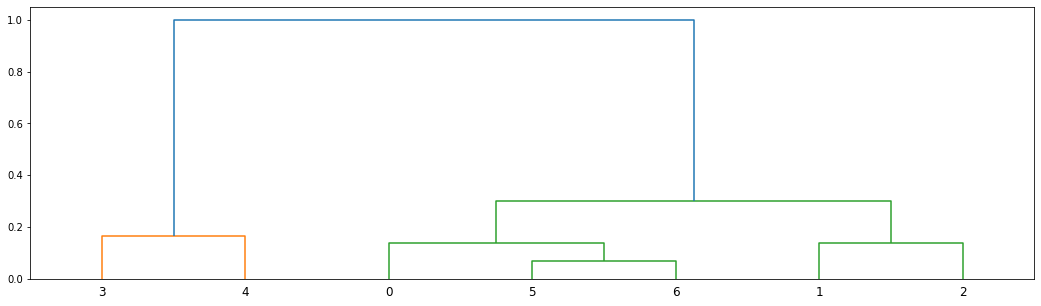

In [45]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [46]:
n_clusters = 3
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [23, 25], 1: [11, 19], 2: [5, 47, 63]}

In [47]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_3 region_0

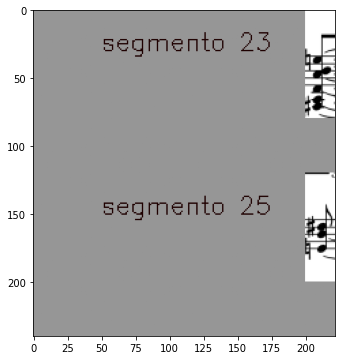

In [48]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_3 region_1

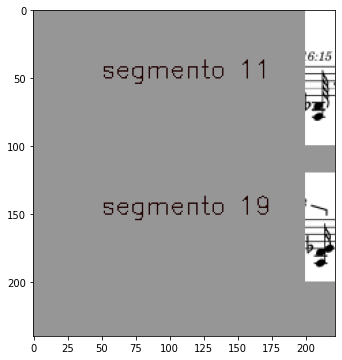

In [49]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

### cluster_3 region_2

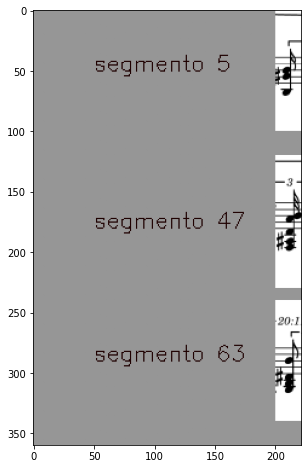

In [50]:
show_segments(dict_fix_numbering[2])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

## Estudo do cluster_4

In [51]:
idx = dict[4]
idx

[28, 60]

O cluster_4 é formado por apenas dois segmentos com sequência de acordes e, por isso, não requer novas subdivisões internas.

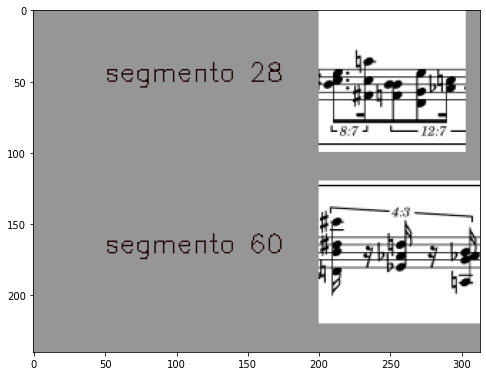

In [52]:
show_segments(idx)
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

## Estudo do cluster_5

In [53]:
idx = dict[5]
idx

[17, 40, 54, 55, 61]

Para esse cluster foram usadas as distâncias *dtw_offsets*, *dtw_profile* e *dtw_scale*, devidamente normalizadas e combinadas, assim como também a *timbre_dist*, para segmentação interna. Os pesos buscaram valorizar registro (*scale*) e timbre.

In [54]:
## full distance dtw_offsets
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_offsets(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X1 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_profile
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_profile(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X2 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X3 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance timbre_dist
dist_mat = []
for i in idx:
    for j in idx:
        timbre1 = df.loc[i, 'timbres']
        timbre2 = df.loc[j, 'timbres']
        dist = timbre_dist(timbre1, timbre2)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X4 = np.array(dist_mat2).reshape((len(idx), len(idx)))

#=============
## média ponderada de X1, X2, X3 e X4
weights = [1,1,2,2]
w = [i/sum(weights) for i in weights]
X = (X1*w[0] + X2*w[1] + X3*w[2] + X4*w[3])

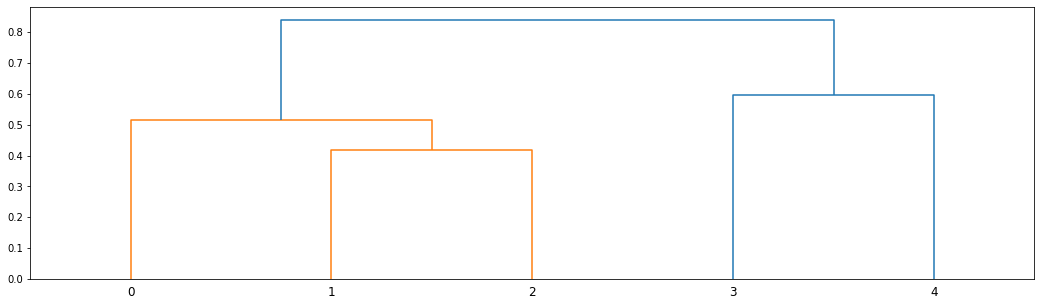

In [55]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [56]:
n_clusters = 2
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [55, 61], 1: [17, 40, 54]}

In [57]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_5 region_0

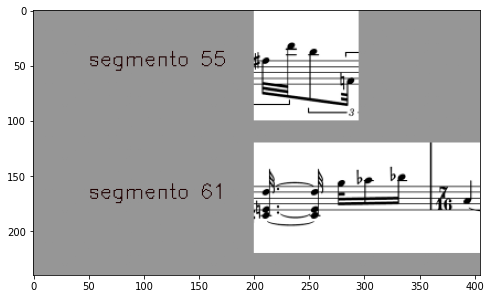

In [58]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

### cluster_5 region_1

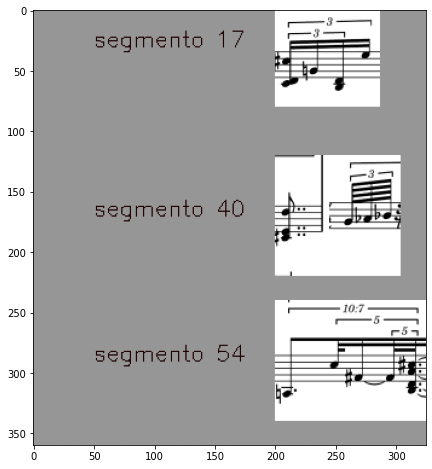

In [59]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

## Estudo do cluster_6

In [60]:
idx = dict[6]
idx

[8, 18, 24, 30, 36, 37, 57, 62]

Para este cluster foram usadas duas métricas: *dtw_scale* e *timbre_dist*.

In [61]:
## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X3 = np.array(dist_mat2).reshape((len(idx), len(idx)))

## full distance timbre_dist
dist_mat = []
for i in idx:
    for j in idx:
        timbre1 = df.loc[i, 'timbres']
        timbre2 = df.loc[j, 'timbres']
        dist = timbre_dist(timbre1, timbre2)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X4 = np.array(dist_mat2).reshape((len(idx), len(idx)))

#=============
## média ponderada de X3 e X4
weights = [1,1]
w = [i/sum(weights) for i in weights]
X = (X4*w[0] + X4*w[1])

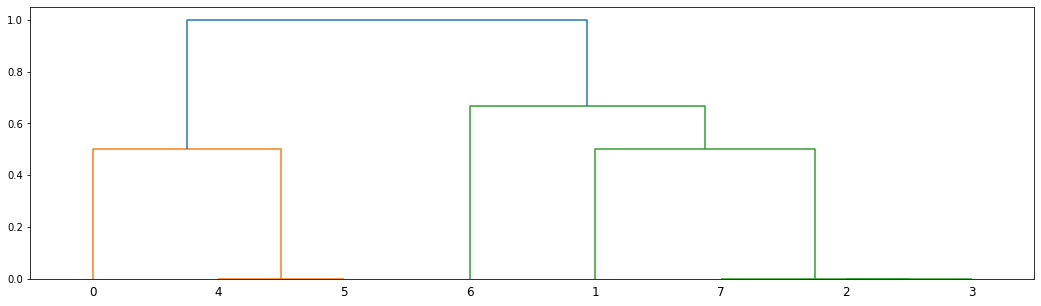

In [62]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [63]:
n_clusters = 3
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [18, 24, 30, 62], 1: [8, 36, 37], 2: [57]}

In [64]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_6 region_0

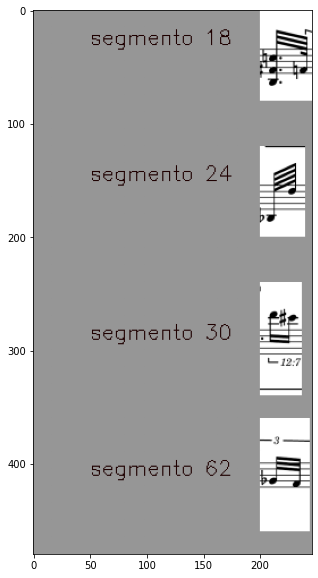

In [65]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,10))
plt.imshow(img)

### cluster_6 region_1

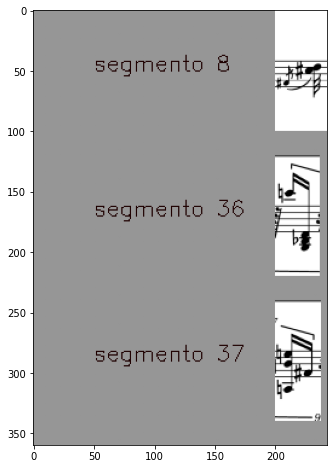

In [66]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

### cluster_6 region_2

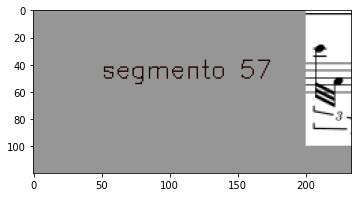

In [67]:
show_segments(dict_fix_numbering[2])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,3))
plt.imshow(img)

## Estudo do cluster_7

In [68]:
idx = dict[7]
idx

[14, 27, 33, 51, 58]

Para este cluster foi apenas usada a métrica *dtw_scale*.

In [69]:
## full distance dtw_scale
dist_mat = []
for i in idx:
    for j in idx:
        dist = dtw_scale(df, i, j)
        dist_mat.append(dist)

# normalize dist_mat
max(dist_mat)
dist_mat2 = [i/max(dist_mat) for i in dist_mat]
X = np.array(dist_mat2).reshape((len(idx), len(idx)))

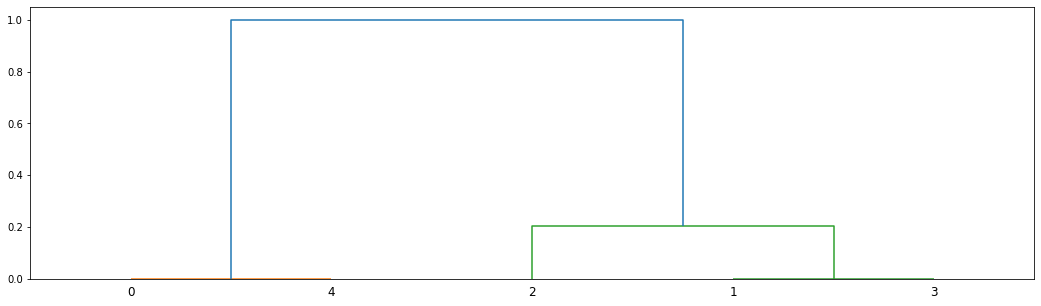

In [70]:
# compressed distance matrix
X_compr = squareform(X)
X_compr.shape

# Create a dendrogram to evaluate the number of clusters
L = linkage(X_compr, 'complete')
plt.figure(figsize=(18,5))
dn = dendrogram(L)
plt.show()

In [71]:
n_clusters = 2
clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete').fit(X)
labels = clusters.labels_
labels

dict_0 = clusters_dict(labels)

dict_fix_numbering = {}
for i, v in enumerate(dict_0.values()):
    temp = []
    for j in v:
        temp.append(idx[j])
    dict_fix_numbering[i] = temp

dict_fix_numbering

{0: [27, 33, 51], 1: [14, 58]}

In [72]:
## visualização

X_embedded = TSNE(n_components=2, learning_rate='auto', metric='precomputed', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

df_cl_3 = pd.DataFrame({ 
                'name': idx,
                'x_coord': X_embedded[:,0], 
                'y_coord': X_embedded[:,1],
                'cluster': [str(i) for i in labels]
                })

chart = alt.Chart(df_cl_3).mark_point().encode(
    x='x_coord', 
    y='y_coord',
    color='cluster',
    tooltip='name'
).interactive()

chart

alt.Chart(...)

### cluster_7 region_0

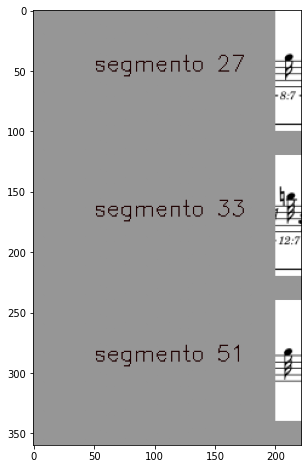

In [73]:
show_segments(dict_fix_numbering[0])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,8))
plt.imshow(img)

### cluster_7 region_1

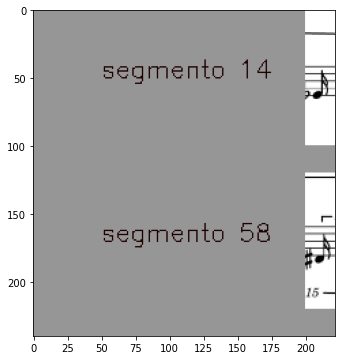

In [74]:
show_segments(dict_fix_numbering[1])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,6))
plt.imshow(img)

---